
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<h1 style="text-align: center;"> Impacto del clima en los viajes realizados en taxis en Chicago</h1>

Introducción

El clima en ciudades como Chicago tiene un impacto significativo en el transporte diario, especialmente en los viajes en taxi. Condiciones como la lluvia pueden afectar tanto la duración como la distribución de los recorridos. Este estudio busca analizar cómo el clima influye en los viajes en taxi, con un enfoque en la duración de los trayectos entre el Loop y el Aeropuerto Internacional O'Hare. Asimismo,se examinará la distribución de viajes en los barrios de la ciudad y el desempeño de las principales empresas de taxis en relación a las condiciones climáticas.

Objetivo

El objetivo de este proyecto es estudiar el impacto del clima en los viajes en taxi en Chicago. Se probará si la duración promedio de los viajes entre el Loop y el Aeropuerto Internacional O'Hare varía en sábados lluviosos. Además, se identificarán los principales barrios en términos de finalización de recorridos y se analizará la relación entre las empresas de taxis y el número de viajes realizados, con el fin de hacer recomendaciones basadas en los resultados.

Etapas del análisis

Limpieza y preparación de datos: Se revisarán los datos de viajes en taxi para identificar y corregir valores faltantes o inconsistentes, asegurando que estén listos para el análisis.
Análisis descriptivo: Se explorarán los datos iniciales para comprender la distribución de la duración de los viajes, tanto en días lluviosos como en días con buen clima y se examinará la frecuencia de los viajes.
Identificación de los principales barrios: Se identificarán los 10 principales barrios donde finalizan la mayoría de los viajes en taxi, se mostrarán mediante gráficos para una mejor comprensión.
Análisis de empresas de taxis: Se analizarán las principales empresas de taxis en términos de número de viajes realizados, prestando especial atención a los días lluviosos y comparando su actividad en diferentes condiciones climáticas.

Prueba de hipótesis: Se planteará la hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto 
Internacional O'Hare varía en sábados lluviosos. Se utilizará una prueba t de muestras independientes para determinar si las diferencias en los tiempos de viaje son significativas.

Conclusiones esperadas

Se espera encontrar una variación significativa en la duración de los viajes hacia O'Hare en días lluviosos, lo que indicaría un impacto del clima en los viajes. También se anticipa que ciertos barrios serán los principales destinos de taxis, lo que revelará la demanda en distintas zonas de la ciudad. Además, se espera identificar las empresas con más viajes y cómo se adaptan a las condiciones climáticas, proporcionando una visión de su eficiencia.



Primero, importaremos las librerías necesarias para desarrollar este proyecto. Luego, realizaremos un análisis preliminar de los datos para identificar y corregir cualquier valor faltante o inconsistente, asegurando así que la información esté lista para su correcto uso en el análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import seaborn as sns

In [2]:
#Extraemos los datasets 
company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
trips_df = pd.read_csv('/datasets/project_sql_result_04.csv')
data_trip_loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recuerda que como buena prática es recomendable cargar todas las bases de datos en una misma celda. Es por ello que te recomiendo cargar la base faltante en esta misma celda..</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

In [3]:
#Obtenemos la información general del dataset donde se muestran las compañías
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
#Corroboramos que no existan datos nulos
company_df_null = company_df.isna().sum()
company_df_null

company_name    0
trips_amount    0
dtype: int64

In [5]:
#Analizamos las columnas que tiene el df de las compañías
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
#Analizamos los datos estadísticos
company_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
#Revisamos si existen datos duplicados
company_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool

In [8]:
#Analizamos la informacion del dataframe de viajes 
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
#Revisamos si existen datos duplicados en dt de viajes
trips_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Length: 94, dtype: bool

In [10]:
#Corroboramos que no existan datos nulos
trips_df_null = trips_df.isna().sum()
trips_df_null

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
#Checamos las columnas del DF de viajes
trips_df.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [12]:
#Pasamos los datos de average_trips a dato entero
trips_df['average_trips'] = trips_df['average_trips'].astype(int)

In [13]:
#Corroboramos que los datos se modificaran de flotante a entero en la columna average_trips
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
#Procedemos a analizar la información de los viajes del loop al aeropuerto Internacional O´hare
data_trip_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [15]:
data_trip_loop_ohare.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1063    False
1064    False
1065     True
1066     True
1067    False
Length: 1068, dtype: bool

In [16]:
#Analizamos las columnas que tenemos
data_trip_loop_ohare.sample(5)

,start_ts,weather_conditions,duration_seconds
730,2017-11-11 13:00:00,Good,2280.0
432,2017-11-11 07:00:00,Good,1419.0
740,2017-11-11 16:00:00,Good,2220.0
997,2017-11-11 12:00:00,Good,1990.0
777,2017-11-11 09:00:00,Good,1494.0


In [17]:
#Obtenemos la información estadística 
data_trip_loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar si contamos con registros duplicados</div>



<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
  
 Agregué el DataFrame a la casilla que sugeriste y corroboré que no existieran duplicados en ninguna fila

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Como hemos observado, no existen inconsistencias en los datos, como mezcla de mayúsculas y minúsculas o valores nulos. Los datos están correctamente almacenados, solo fue necesario corregir el valor promedio (average) a un entero, los demás están en formatos correctos. 

Ahora, procederemos a identificar las 10 principales compañías y barrios en términos de finalización de recorridos. Mostraremos gráficos que representen el número de viajes por compañía de taxis y los 10 principales barrios según el número de viajes.

In [18]:
#Crearemos un DataFrame que muestre las 10 compañías con mayor cantidad de viajes realizados
top_10_company = company_df.sort_values('trips_amount', ascending=False).head(10)
top_10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [19]:
#Establecemos 'company_name' como el índice del DataFrame para facilitar el acceso y la visualización de las compañías.
top_10_company = top_10_company.set_index('company_name')

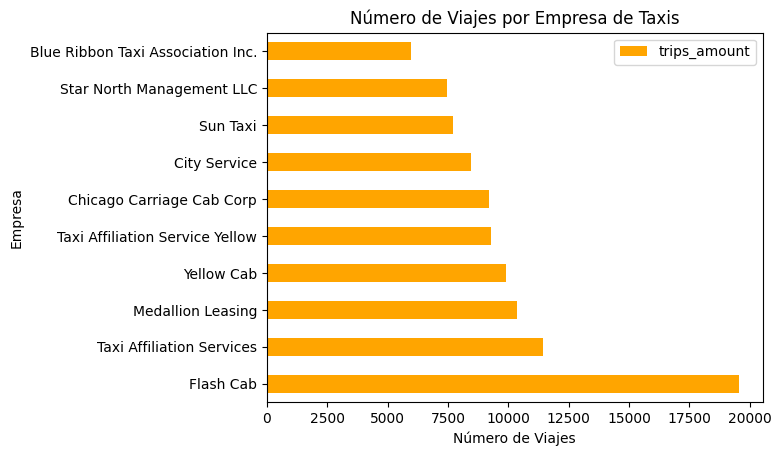

In [20]:
#Generamos el gráfico para visualizar mejor los datos.
top_10_company.plot(kind='barh', color='orange').set_title('Número de Viajes por Empresa de Taxis')

plt.ylabel('Empresa')
plt.xlabel('Número de Viajes')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis, muestras de manera clara cuales son los 10 principales barrios en términos de finalización del recorrido
    </div>

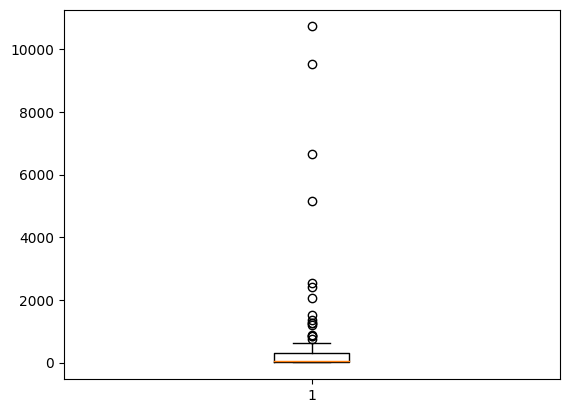

In [21]:
#Generamos un diagrama de caja para analizar el promedio por número de viajes 
plt.boxplot(trips_df['average_trips'])
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Como podemos ver en la gráfica, Flash Cab es la empresa que realiza más viajes, seguida de Taxi Affiliation Services y Medallion Leasing.
  

    
    
El diagrama de caja anterior es una muestra preliminar en la que podemos observar la presencia de datos atípicos (outliers), lo cual podría deberse a que algunos barrios en Chicago tienen una demanda de taxis significativamente mayor que otros. Posteriormente, procederemos a eliminar estos outliers para obtener un análisis más preciso y evitar que distorsionen los resultados estadísticos.

In [22]:
#Realizamos un DF para poder ver el top 10 de destinos
top_10_destinos = trips_df.sort_values('average_trips', ascending=False).head(10)
top_10_destinos

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [23]:
#Establecemos 'dropoff_location_name' como el índice del DataFrame 
top_10_destinos.set_index('dropoff_location_name', inplace=True)

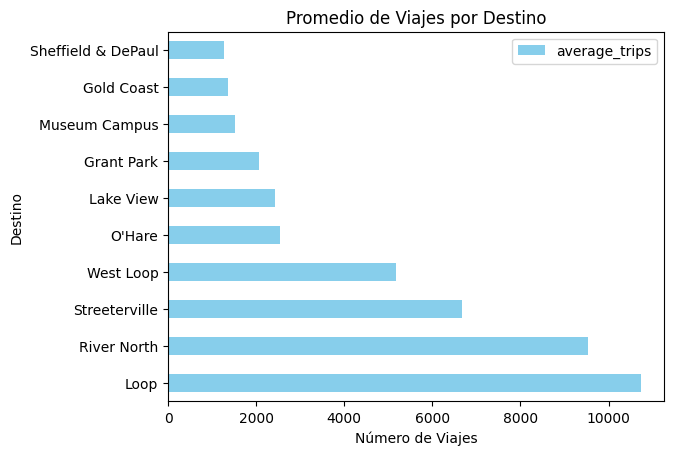

In [24]:
#Graficamos para visualizar los barrios con mas viajes
top_10_destinos.plot(kind='barh', color='skyblue').set_title('Promedio de Viajes por Destino')
plt.ylabel('Destino')
plt.xlabel('Número de Viajes')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">

A partir de la información presentada, podemos observar que los barrios con el mayor número de viajes son Loop, River North y Streeterville. Esto puede atribuirse a su ubicación central, que los convierte en destinos turísticos populares y áreas donde se concentran numerosas oficinas. En Chicago, existen 94 barrios y la alta concentración de viajes en estos tres lugares puede generar valores atípicos, lo que se refleja en el diagrama de caja.

En cuanto a las compañías de taxis, las que realizan la mayor cantidad de viajes son Flash Cab, seguidas por Taxi Affiliation Services y Medallion Leasing.


Para llevar a cabo la comprobación de hipótesis, comenzaremos importando la información necesaria y realizando un análisis preliminar. En el siguiente DataFrame, se presenta la información esencial para analizar los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

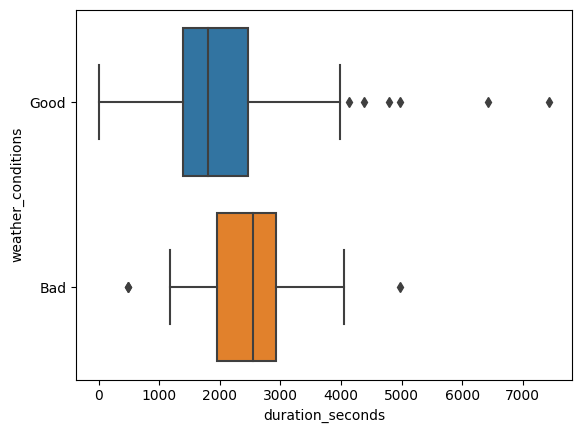

In [25]:
# Se genera un diagrama de caja para visualizar la duración de los viajes en segundos según las condiciones climáticas.
sns.boxplot(x='duration_seconds',y='weather_conditions', data=data_trip_loop_ohare)
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Al igual que en el diagrama de caja de los viajes, también podemos observar la presencia de valores atípicos en la duración de los viajes. Estos outliers pueden deberse a factores como condiciones de tráfico inusuales o barrios en Chicago con alta demanda de taxis. Para garantizar que nuestra comprobación de hipótesis no se vea afectada por estas anomalías, procederemos a eliminarlos.

In [26]:
# Se calcula el primer cuartil (Q1) de la duración de los viajes en segundos
Q1 = data_trip_loop_ohare['duration_seconds'].quantile(0.25)

In [27]:
# Se calcula el tercer cuartil (Q3) de la duración de los viajes en segundos
Q3 = data_trip_loop_ohare['duration_seconds'].quantile(0.75)

In [28]:
# Se calcula el rango intercuartílico (IQR) restando el primer cuartil (Q1) del tercer cuartil (Q3) 
# para identificar la dispersión de los datos.
IQR = Q3 - Q1

In [29]:
# Se calcula el límite superior para identificar outliers.
limite_superior = Q3 + (1.5*IQR)
limite_superior

4292.625

Prueba de Hipótesis
Hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos."

Nivel de significación (α): Para este análisis, se establecerá un nivel de significación de 0.05. Este valor es comúnmente utilizado en estudios estadísticos y permite un equilibrio adecuado entre la detección de diferencias significativas.

Hipótesis
Hipótesis nula (H₀): La duración promedio de los viajes en sábados lluviosos es igual a la duración promedio en días sin lluvia.

Hipótesis alternativa (H₁): La duración promedio de los viajes en sábados lluviosos es diferente a la duración promedio en días sin lluvia.

In [30]:
# Filtramos los datos para eliminar los outliers, manteniendo solo las observaciones donde 
# la duración de los viajes es menor o igual al límite superior establecido.

data_hipotesis = data_trip_loop_ohare.query('duration_seconds <= @limite_superior')
data_hipotesis.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


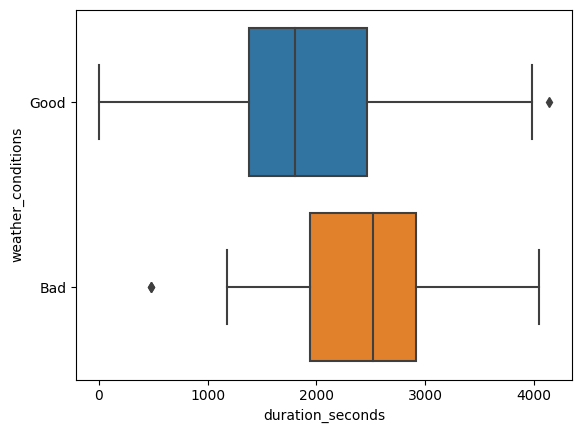

In [31]:
#Realizamos diagrama utilizando los datos filtrados sin outliers.
sns.boxplot(x='duration_seconds', y='weather_conditions', data=data_hipotesis)
plt.show()

In [ ]:
#procedemos a usar levene para analizar las varianzas entre ambas hipotesis
results_levene = st.levene(sample.duration_seconds, rain_sample.duration_seconds)
print(f"Valor p de la prueba de Levene: {results_levene.pvalue:f}")
if results_levene.pvalue > 0.05:
    print("No se rechaza la hipótesis nula de igualdad de varianzas. Esto sugiere que las varianzas de las duraciones de los viajes en días buenos y malos son homogéneas, permitiendo el uso de la prueba t de Student convencional para comparar las medias.")
else:
    print("Se rechaza la hipótesis nula de igualdad de varianzas. Esto sugiere que las varianzas son diferentes, lo que podría requerir un enfoque diferente para la comparación de medias.")


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

Debido a la igualdad de varianzas, procederemos a realizar la prueba de ttest regular.

In [ ]:
alpha = 0.05
sample = data_hipotesis.query('weather_conditions == "Good"')
rain_sample = data_hipotesis.query('weather_conditions == "Bad"')

results = st.ttest_ind(sample.duration_seconds, rain_sample.duration_seconds)
# Imprimimos el valor p para evaluar la hipótesis
print(f"Valor p de la prueba t: {results.pvalue:f}")

# Evaluamos las hipótesis
if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula (H₀): la duración promedio de los viajes en sábados lluviosos es diferente a la duración promedio en días sin lluvia.")
else:
    print("No se rechaza la hipótesis nula (H₀): no hay evidencia suficiente para afirmar que la duración promedio de los viajes en sábados lluviosos es diferente a la duración promedio en días sin lluvia.")

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Existe una diferencia estadísticamente significativa entre la duración promedio de los viajes en sábados lluviosos y en días sin lluvia. En otras palabras, podemos rechazar la hipótesis nula (H₀) que sostiene que no hay diferencias en las duraciones de los viajes y aceptar la hipótesis alternativa (H₁), que sugiere que la duración promedio de los viajes en días lluviosos es diferente.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con la prueba de levene! Solamente recuerda que primero realizamos esta prueba y el resultado lo usamos dentro como argumento de la prueba de igualdad de medias
    </div>

Conclusión y Recomendaciones 

El análisis realizado sobre la duración de los viajes en taxi desde el Loop hasta el Aeropuerto Internacional O'Hare en días lluviosos ha revelado una variación significativa en los tiempos de viaje en comparación con días sin lluvia. Los resultados de la prueba de hipótesis indican que la duración promedio de los viajes es, efectivamente, diferente en condiciones climáticas adversas, lo que sugiere un impacto notable del clima en la experiencia del usuario.

Además, se identificaron los barrios con mayor demanda de taxis, lo que puede ayudar a optimizar la asignación de vehículos y recursos en estos sectores. La identificación de las compañías de taxis más activas también proporciona información valiosa para mejorar la eficiencia operativa.

Las recomendaciones propuestas, que incluyen la optimización de rutas, incentivos para conductores, un sistema de monitoreo en tiempo real y una mejor comunicación con los usuarios, tienen el potencial de mejorar significativamente el servicio de taxis en Chicago. Implementar estas estrategias no solo beneficiaría a los conductores, sino que también aumentaría la satisfacción del cliente, especialmente en días lluviosos cuando la demanda puede ser alta.

En resumen, este estudio destaca la necesidad de adaptarse a las condiciones climáticas cambiantes y sugiere que las empresas de taxis deben estar preparadas para ajustar sus operaciones en consecuencia, con el fin de ofrecer un servicio más eficiente y satisfactorio a sus usuarios.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:


* Realizar un análisis de duplicados
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>